# Iris Data-sets

step 1 : Importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Step 2 : Loading data of iris

In [2]:
# iris = pd.read_csv("iris.csv")

In [3]:
# iris

In [4]:
iris = datasets.load_iris()

In [5]:
iris
# iris.target

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
df = pd.DataFrame({
    'x':iris.data[:,0],
    'y':iris.data[:,1],
    'cluster' : iris.target
})

In [7]:
df

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


# Finding the centroids

In [8]:
centroids = {}
for i in range(3):
    result = []
    result.append(df.loc[df['cluster'] == i]['x'].mean())
    result.append(df.loc[df['cluster'] == i]['y'].mean())
    centroids[i] = result

In [9]:
centroids 

{0: [5.006, 3.428],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.974]}

# Plotting The Graph 

Step 3 : Draw the scatter graph of cluster

Text(0, 0.5, 'Speal Width ')

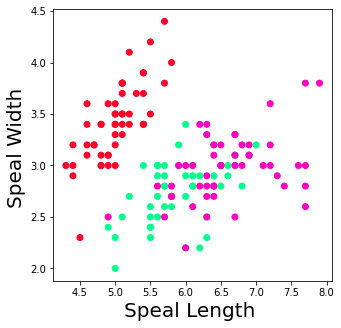

In [10]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'] ,df['y'], c = iris.target,cmap = 'gist_rainbow')
plt.xlabel('Speal Length ',fontsize=20)
plt.ylabel('Speal Width ',fontsize=20)

Step 4: Now, Draw the scatter graph of centroids 

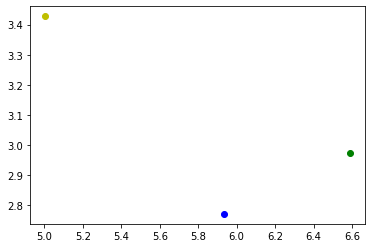

In [11]:
cen_map = {0:'y',1:'b',2:'g'}
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],color = cen_map[i])
plt.show()

Step 5 : Merging the centroids & cluster scatter graphs

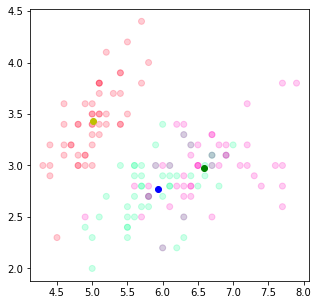

In [12]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'] ,df['y'], c = iris.target,cmap = 'gist_rainbow',alpha = 0.2)

cen_map = {0:'y',1:'b',2:'g'}
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],color = cen_map[i])
plt.show()

# Assignment Stage

Step 6 :  Ccalculating  distance and updating dataFrame

In [13]:
def assignment(df,centroids):
    for i in centroids.keys():
        #sqrt((x1-x2)^2 + (y1-y2))
        df['distance_from_{}'.format(i)] =(
            np.sqrt(
                (df['x']-centroids[i][0]) ** 2 + 
                (df['y']-centroids[i][1]) ** 2
            )
        )
        centroids_dis_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:,centroids_dis_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x : int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x : cen_map[x])
    return df

In [14]:
df = assignment(df,centroids)
df

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,y
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,y
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,y
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,y
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,y
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.797870,0.114978,2,g
146,6.3,2.5,2,1.592363,0.453206,0.554635,1,b
147,6.5,3.0,2,1.554098,0.609094,0.091761,2,g
148,6.2,3.4,2,1.194328,0.683078,0.576212,2,g


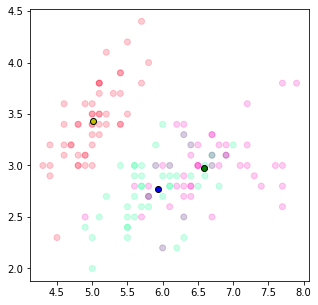

In [15]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'] ,df['y'], c = iris.target,cmap = 'gist_rainbow',alpha = 0.2)

cen_map = {0:'y',1:'b',2:'g'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color = cen_map[i],edgecolor = 'k')
plt.show()

# Updating our new centroids 

In [16]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest']==i]['x'])
        centroids[i][1] = np.mean(df[df['closest']==i]['y'])
        
    return k

In [17]:
centroids = update(centroids )
centroids 

{0: [5.009433962264151, 3.3830188679245285],
 1: [5.806122448979591, 2.693877551020408],
 2: [6.802083333333333, 3.06875]}

Step 7 : Visualising the graph with updated centroids 

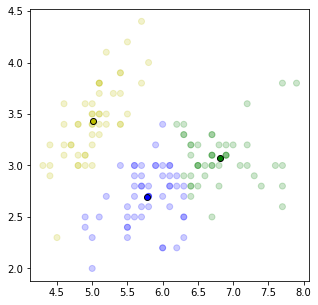

In [25]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'] ,df['y'], color = df ['color'],alpha = 0.2)
for i in centroids.keys():
    plt.scatter(*centroids[i],color = cen_map[i],edgecolor = 'k')
plt.show()

# Repeat assignment stages to ressign the points with cluster 

In [19]:
df = assignment(df,centroids )

step 8 : visualising the updated graphs

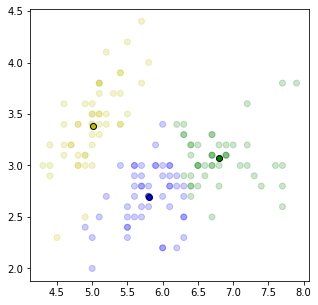

In [20]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'] ,df['y'], color = df ['color'],alpha = 0.2)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],color = cen_map[i],edgecolor = 'k')
plt.show()

In [21]:
while True :
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df,centroids)
    if closest_centroids.equals(df['closest']):
        break

# Final Result

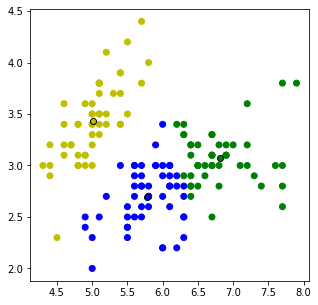

In [22]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'] ,df['y'], color = df ['color'])
for i in centroids.keys():
    plt.scatter(*centroids[i],color = cen_map[i],edgecolor = 'k')
plt.show()

# Previous Cluster

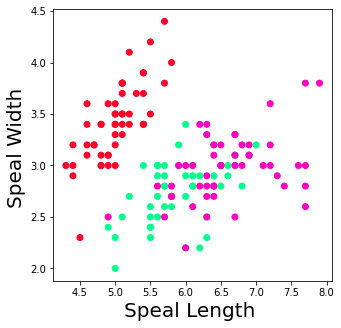

In [23]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'] ,df['y'], c = iris.target,cmap = 'gist_rainbow')
plt.xlabel('Speal Length ',fontsize=20)
plt.ylabel('Speal Width ',fontsize=20)
plt.show()

# Thanks for watching , plz review my work .